In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [68]:
import matplotlib
del matplotlib.font_manager.weight_dict['roman']
matplotlib.font_manager._rebuild()

In [2]:
a = np.array([0,0,0,1,2], dtype=np.float)
b = np.array([0,1,0,1,1], dtype=np.float)
np.divide(a, a+b, out=np.ones_like(a), where=(a+b)!=0)

array([1.        , 0.        , 1.        , 0.5       , 0.66666667])

In [3]:
np.array([1,2,4,3,1]).argsort()[::-1][2]

1

In [4]:
np.array([[1,2,4,3,1],[2,4,1,3,5]]).argsort()[:,::-1][:,2]

array([1, 3])

In [25]:
result = np.array([
    [[3,1,1],
     [2,2,1],
     [3,2,1],
     [2,5,1]],
    [[2,1,1],
     [6,2,1],
     [1,0,1],
     [1,1,1]]
], dtype=np.float)

In [26]:
num_players = result.shape[0]
num_arms = result.shape[1]
# Experienced average for each player. 1 if each machine has never been pulled.
experienced_average = np.divide(result[:,:,0], result[:,:,0]+result[:,:,1], out=np.ones_like(result[:,:,0]), where=(result[:,:,0]+result[:,:,1])!=0)
beta_list = np.pi * (result[:,:,0]+result[:,:,1]+2) * np.sqrt((result[:,:,0]+result[:,:,1]+3)/(6*(result[:,:,0]+1)*(result[:,:,1]+1)))
# Optimal beta for each player.
beta = beta_list[range(num_players), experienced_average.argsort()[:,::-1][:,num_players]]
preference = experienced_average * beta.reshape(num_players, 1)
preference -= preference.max(axis=1).reshape(-1,1)
preference = np.exp(preference)
print(beta)
print(preference)

[6.78661579 6.41274915]
[[1.         0.18329582 0.36131961 0.04281235]
 [0.11793955 0.20125404 1.         0.04050319]]


In [44]:
selection_prob = np.zeros((num_players, num_arms))
all_permutations = list(itertools.permutations(range(num_arms)))
for order in all_permutations:
    tmp_pref = preference.copy()
    tmp_pref[:, order[0]] = 0
    p = preference[:, order[0]]/preference.sum(axis=1) * preference[:, order[1]]/tmp_pref.sum(axis=1)
    selection_prob[:, order[0]] += p/2
    selection_prob[:, order[1]] += p/2

In [45]:
print(selection_prob)
selection_prob /= selection_prob.sum(axis=1).reshape(-1,1)
selection_prob

[[0.91528301 0.34925848 0.65110922 0.0843493 ]
 [0.34561831 0.57811279 0.95566088 0.12060802]]


array([[0.4576415 , 0.17462924, 0.32555461, 0.04217465],
       [0.17280915, 0.28905639, 0.47783044, 0.06030401]])

In [50]:
selections = list(itertools.product(range(num_arms), repeat=num_players))
selection_matrix = selection_prob[range(num_players),selections].prod(1)
selection_matrix = selection_matrix.reshape(num_arms, num_arms)
selection_matrix /= selection_matrix.sum()
print(selection_matrix)

[[0.07908464 0.1322842  0.21867504 0.02759762]
 [0.03017753 0.0504777  0.08344317 0.01053084]
 [0.05625882 0.09410364 0.1555599  0.01963225]
 [0.00728817 0.01219085 0.02015233 0.0025433 ]]


In [47]:
input_state = np.array([0, 1/12, 1/12, 1/12, 1/12, 0, 1/12, 1/12, 1/12, 1/12, 0, 1/12, 1/12, 1/12, 1/12, 0])

In [54]:
joint_matrix = selection_matrix * input_state.reshape(num_arms, num_arms)
joint_matrix = (joint_matrix/joint_matrix.sum()).reshape(-1,)

In [55]:
joint_matrix

array([0.        , 0.18570519, 0.30698366, 0.0387425 , 0.04236427,
       0.        , 0.11714043, 0.01478357, 0.07897809, 0.13210598,
       0.        , 0.02756044, 0.01023138, 0.01711394, 0.02829055,
       0.        ])

In [2]:
# compare_source_prob

In [17]:
# env
num_arms = 7
list(set(itertools.permutations([0.1]*(num_arms-4) + [0.3, 0.5, 0.7, 0.9])))

840

In [27]:
# input_state
N = 4

In [30]:
np.power(np.sin(np.pi/N * (np.arange(4).reshape(-1,1) - np.arange(4))),2) / N**2

array([[0.     , 0.03125, 0.0625 , 0.03125],
       [0.03125, 0.     , 0.03125, 0.0625 ],
       [0.0625 , 0.03125, 0.     , 0.03125],
       [0.03125, 0.0625 , 0.03125, 0.     ]])

In [41]:
input = np.ones((N,N))/(2*N*(N-1))
np.fill_diagonal(input, 0)
input

array([[0.        , 0.04166667, 0.04166667, 0.04166667],
       [0.04166667, 0.        , 0.04166667, 0.04166667],
       [0.04166667, 0.04166667, 0.        , 0.04166667],
       [0.04166667, 0.04166667, 0.04166667, 0.        ]])

In [34]:
1/24

0.041666666666666664

In [2]:
# Figure
convs = [2,2.5,3]
ideals = [2,2.8,3]
amps = [3,2.1,2]
rotations = [1,2,6]

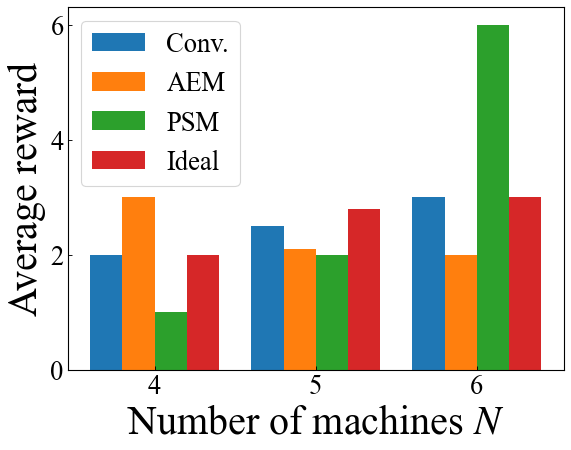

In [12]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 36
plt.rcParams["legend.fontsize"] = 24
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.linewidth'] = 1.0

plt.figure(figsize=(8, 6), dpi=80)

x1 = np.arange(3) + 1
x2 = x1 + 0.2
x3 = x2 + 0.2
x4 = x3 + 0.2
label_x = [4,5,6]

plt.bar(x1, convs, width=0.2, label='Conv.', align="center")
plt.bar(x2, amps, width=0.2, label='AEM', align="center")
plt.bar(x3, rotations, width=0.2, label='PSM', align="center")
plt.bar(x4, ideals, width=0.2, label='Ideal', align="center")
# 凡例
plt.legend(loc='best')

plt.rcParams["font.size"] = 18
# plt.tight_layout()
# plt.tick_params(labelsize=24)
plt.xlabel('Number of machines $N$')
plt.ylabel('Average reward')
plt.xticks([1.3, 2.3, 3.3], label_x)
plt.savefig('test.pdf', bbox_inches="tight", pad_inches=0.05)

In [2]:
# rotate input
def generate_input(num_arms, method='conv'):
    if method == 'conv' or method == 'psm':
        input_state = np.power(np.sin(np.pi/num_arms * (np.arange(num_arms).reshape(-1,1) - np.arange(num_arms))),2) / num_arms**2
    elif method == 'aem':
        pass
    elif method == 'ideal':
        input_state = np.ones((num_arms,num_arms))/(2*num_arms*(num_arms-1))
        np.fill_diagonal(input_state, 0)
    return input_state
input_state = generate_input(4, 'psm')

In [24]:
num_arms = 4
rng = np.random.default_rng()
permute = rng.permutation(4)
np.power(np.sin(np.pi/num_arms * (permute.reshape(-1,1) - permute)),2) / num_arms**2

array([[0.     , 0.03125, 0.03125, 0.0625 ],
       [0.03125, 0.     , 0.0625 , 0.03125],
       [0.03125, 0.0625 , 0.     , 0.03125],
       [0.0625 , 0.03125, 0.03125, 0.     ]])

In [3]:
input_state

array([[0.     , 0.03125, 0.0625 , 0.03125],
       [0.03125, 0.     , 0.03125, 0.0625 ],
       [0.0625 , 0.03125, 0.     , 0.03125],
       [0.03125, 0.0625 , 0.03125, 0.     ]])

In [18]:
permute

array([1, 3, 2, 0])

In [19]:
angles = np.array([0, np.pi/4,np.pi/2,np.pi*3/4])

In [25]:
tmp = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        tmp[i,j] = np.sin(angles[permute[i]]-angles[permute[j]])**2 / 16
tmp

array([[0.     , 0.03125, 0.03125, 0.0625 ],
       [0.03125, 0.     , 0.0625 , 0.03125],
       [0.03125, 0.0625 , 0.     , 0.03125],
       [0.0625 , 0.03125, 0.03125, 0.     ]])